# Evaluate DiADM for memorization  

## Overview 



In [1]:
import sys
from pathlib import Path
# Add the directory containing edm2/generate.py to the Python path
script_dir = Path("/vol/ideadata/ed52egek/pycharm/trichotomy").resolve()  # Replace with the actual path
sys.path.append(str(script_dir))

from src.dse import DiADMSampleEvaluator
from src.diffusion.generation import get_image_generation_model, ImageIterableDSE


In [31]:
from src.dse import get_classification_model, DEFAULT_CLF_PATH
from PIL import Image
clf = get_classification_model(DEFAULT_CLF_PATH)

image_r_1 = Image.open("/vol/ideadata/ed52egek/data/chestxray14/images/00007303_000.png").convert('RGB')  
image_s_1 = Image.open("./00000001_000_1.png").convert('RGB')  
image_s_2 = Image.open("./00000001_000_2nd.png").convert('RGB')  


/vol/ideadata/ed52egek/miniconda/envs/trichotomy/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/vol/ideadata/ed52egek/miniconda/envs/trichotomy/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/vol/ideadata/ed52egek/pycharm/trichotomy/src/dse.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during u

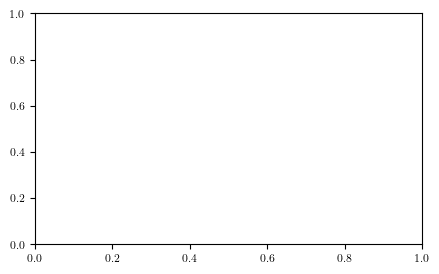

<Figure size 600x300 with 0 Axes>

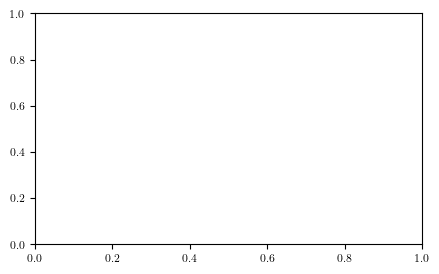

<Figure size 600x300 with 0 Axes>

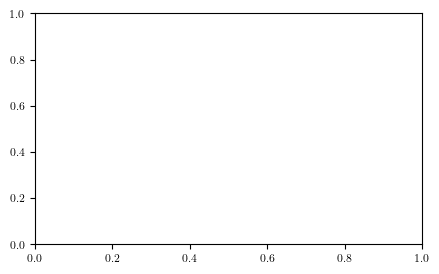

<Figure size 600x300 with 0 Axes>

In [32]:
from src.utils import update_matplotlib_font
import seaborn as sns
import matplotlib.pyplot as plt

update_matplotlib_font()


for img, title in zip([image_r_1, image_s_1, image_s_2], ["real", "snth1", "snth2"]): 
    pred_, f_clf = clf.lazy_foward(img)
    fig, ax =  plt.subplots(figsize=(5, 3))

    f_clf_viz = f_clf[f_clf > 0.1][:18]

    # Normalize heights for colormap
    colors = plt.cm.RdPu((f_clf_viz - f_clf_viz.min()) / (f_clf_viz.max() - f_clf_viz.min()))

    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(range(len(f_clf_viz)), f_clf_viz, color=colors, width=0.8,  edgecolor=".5",)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)

    plt.tight_layout()
    plt.savefig(f"features_{title}_r.pdf")
    plt.clf()


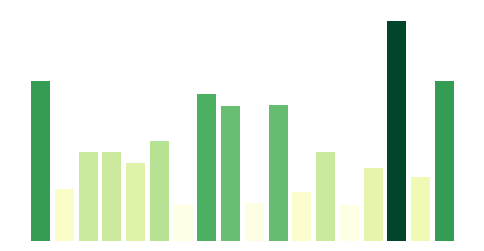